# Flower Images Classification

## Project Setup

Import libraries

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

Set the seed value for experiment reproducibility

In [3]:
seed = 1842
tf.random.set_seed(seed)
np.random.seed(seed)

## Data Preparation

Load the dataset then rescale

In [4]:
train_image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
submission_image_generator = ImageDataGenerator(rescale=1/255)


In [5]:
training_set = train_image_generator.flow_from_directory(batch_size=32,
                                                   directory="datasets/Train/",
                                                   shuffle=True,
                                                   target_size=(224, 224),
                                                   subset="training",
                                                   class_mode="categorical")

validation_set = train_image_generator.flow_from_directory(batch_size=32,
                                                   directory="datasets/Train/",
                                                   shuffle=True,
                                                   target_size=(224, 224),
                                                   subset="validation",
                                                   class_mode="categorical")

submission = submission_image_generator.flow_from_directory(batch_size=32,
                                                   directory="datasets/Test/",
                                                   shuffle=False,
                                                   target_size=(224, 224),
                                                   class_mode=None)

Found 430 images belonging to 2 classes.
Found 106 images belonging to 2 classes.
Found 100 images belonging to 1 classes.


Show flowers for the first batch

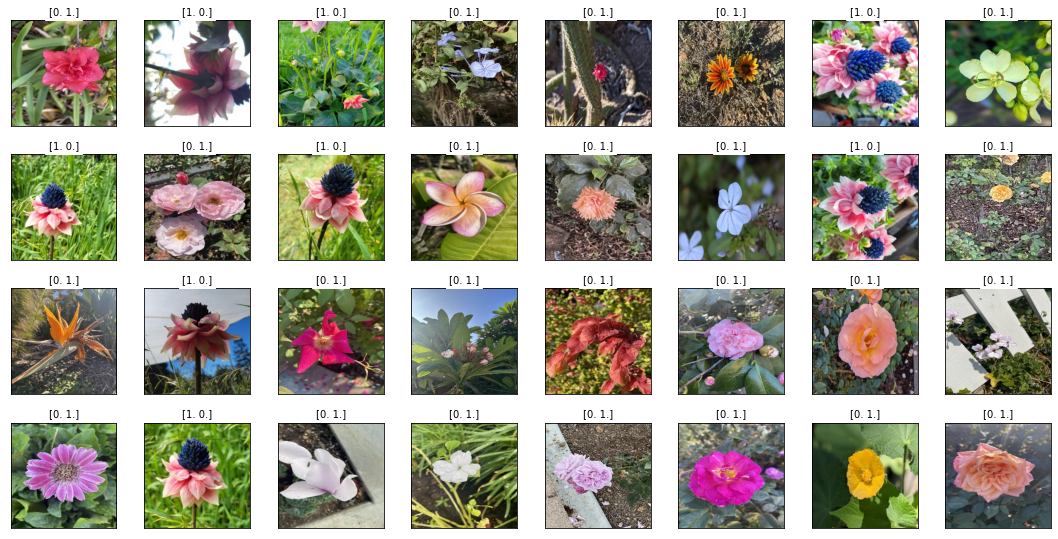

In [6]:
fig = plt.figure(figsize=(15, 15))

batch_1_img = training_set[0]
for i in range(32):
    digit = batch_1_img[0][i]
    label = batch_1_img[1][i]
    #digit_image = digit.reshape(28, 28)
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digit, cmap=plt.cm.binary)
    ax.set_title(str(label), backgroundcolor='white', fontsize=10)
plt.tight_layout()

# Model Training

Create the convolutional neural network model

In [7]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', input_shape = [224, 224, 3]),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation ='softmax')])

Shows the summary of the model

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 32)        0         
                                                                 
 flatten (Flatten)           (None, 93312)             0

Compile the model

In [9]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3,
                                         restore_best_weights=True)

Fit the model

In [10]:
history = model.fit(training_set, epochs=20, validation_data=validation_set, callbacks=callback)

Epoch 1/20
14/14 [==============================] - 10s 645ms/step - loss: 0.9166 - accuracy: 0.7047 - val_loss: 0.6125 - val_accuracy: 0.7075
Epoch 2/20
14/14 [==============================] - 9s 638ms/step - loss: 0.5458 - accuracy: 0.7279 - val_loss: 0.5304 - val_accuracy: 0.8113
Epoch 3/20
14/14 [==============================] - 9s 638ms/step - loss: 0.4569 - accuracy: 0.8326 - val_loss: 0.4173 - val_accuracy: 0.8868
Epoch 4/20
14/14 [==============================] - 9s 605ms/step - loss: 0.3629 - accuracy: 0.8558 - val_loss: 0.3354 - val_accuracy: 0.8679
Epoch 5/20
14/14 [==============================] - 9s 660ms/step - loss: 0.2798 - accuracy: 0.8977 - val_loss: 0.3269 - val_accuracy: 0.8396
Epoch 6/20
14/14 [==============================] - 10s 722ms/step - loss: 0.1923 - accuracy: 0.9279 - val_loss: 0.3171 - val_accuracy: 0.8491
Epoch 7/20
14/14 [==============================] - 10s 721ms/step - loss: 0.1300 - accuracy: 0.9721 - val_loss: 0.2845 - val_accuracy: 0.8868
Epo

Plot the loss and accuracy plot

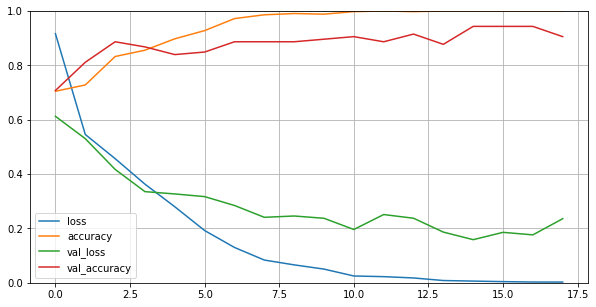

In [11]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Evaluate the validation set

In [12]:
loss, accuracy = model.evaluate(validation_set)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

4/4 [==============================] - 1s 137ms/step - loss: 0.1587 - accuracy: 0.9434
Loss:  0.15868739783763885
Accuracy:  0.9433962106704712


Predict the submission

In [13]:
test_predicted = model.predict(submission)
test_predicted

4/4 [==============================] - 1s 232ms/step


array([[4.83880376e-06, 9.99995112e-01],
       [2.10622005e-17, 1.00000000e+00],
       [2.38706708e-08, 1.00000000e+00],
       [3.93456850e-10, 1.00000000e+00],
       [6.60142905e-06, 9.99993443e-01],
       [1.28818490e-03, 9.98711824e-01],
       [7.93061554e-06, 9.99992013e-01],
       [6.56233905e-16, 1.00000000e+00],
       [1.14773719e-08, 1.00000000e+00],
       [2.62830008e-06, 9.99997377e-01],
       [3.77467200e-02, 9.62253213e-01],
       [5.30478383e-06, 9.99994755e-01],
       [3.42206804e-05, 9.99965787e-01],
       [3.16883568e-11, 1.00000000e+00],
       [8.17519519e-03, 9.91824806e-01],
       [7.83662871e-02, 9.21633720e-01],
       [5.18718889e-06, 9.99994755e-01],
       [3.53754550e-01, 6.46245420e-01],
       [5.56621217e-06, 9.99994397e-01],
       [1.00000000e+00, 1.05424020e-11],
       [6.00290987e-05, 9.99939919e-01],
       [1.03810525e-08, 1.00000000e+00],
       [3.81830802e-07, 9.99999642e-01],
       [1.07984990e-08, 1.00000000e+00],
       [2.364058

Create submissions

In [14]:
onlyfiles = [f.split('.')[0] for f in os.listdir(os.path.join('datasets/Test/image_files')) if os.path.isfile(os.path.join(os.path.join('datasets/Test/image_files'), f))]
submission_df = pd.DataFrame(onlyfiles, columns =['images'])
submission_df[['la_eterna','other_flower']] = model.predict(submission)
submission_df.head(10)

4/4 [==============================] - 1s 120ms/step


,images,la_eterna,other_flower
0,img_00,4.838804e-06,0.999995
1,img_01,2.106220e-17,1.000000
2,img_02,2.387067e-08,1.000000
3,img_03,3.934569e-10,1.000000
4,img_04,6.601429e-06,0.999993
5,img_05,1.288185e-03,0.998712
6,img_06,7.930616e-06,0.999992
7,img_07,6.562339e-16,1.000000
8,img_08,1.147737e-08,1.000000
9,img_09,2.628300e-06,0.999997


In [15]:
submission_df.round(1)

,images,la_eterna,other_flower
0,img_00,0.0,1.0
1,img_01,0.0,1.0
2,img_02,0.0,1.0
3,img_03,0.0,1.0
4,img_04,0.0,1.0
...,...,...,...
95,img_95,0.5,0.5
96,img_96,0.1,0.9
97,img_97,0.0,1.0
98,img_98,0.0,1.0


In [16]:
submission_df.to_csv('submission_file.csv', index = False)